<a href="https://colab.research.google.com/github/AndresSepulveda/PHP_LucasC/blob/main/Codigos/Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# DESCRIPCIÓN: CONSTRUCCIÓN DE REGRESIÓN LINEAL MÚLTIPLE PARA REFINAR EL PRONÓSTICO DE MOSA-WRF.
# versión preliminar.

# AUTOR: Lucas Calbucura Zúñiga. Lcalbucura2017@udec.cl

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib import style
import seaborn as sns
import datetime
from datetime import datetime, timedelta

# Utilidades
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cargamos los 1097 datos diarios desde GitHub, es importante que los archivos estén en formato .csv
# Hasta el momento se tienen las variables T2, T2_WRF, P_WRF, U10_WRF, V10_WRF (promedio, máximo y mínimo para c/u)
# ==============================================================================
APIAO_diario = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/APIAO_diario.csv') 
APIAO_diario = APIAO_diario.drop(['Time'], axis=1)
CUCAO_diario = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/CUCAO_diario.csv')
CUCAO_diario = CUCAO_diario.drop(['Time'], axis=1)
MELINKA_diario = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/MELINKA_diario.csv')
MELINKA_diario = MELINKA_diario.drop(['Time'], axis=1)

# Creamos el vector fecha 
# ==============================================================================
t = np.arange(np.datetime64('2018-08-01'), np.datetime64('2021-08-02'))
time= pd.to_datetime(t)

# Para revisar los NaN
# ==============================================================================
# CUCAO_diario["Mean_WRF"].isnull().sum().sum() 

# Interpolamos los datos faltantes a utilizar en la regresión lineal múltiple 
# ==============================================================================
# APIAO (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Mean=APIAO_diario["T2_WRF_mean"].interpolate(method='polynomial',order=2); APIAO_diario["T2_WRF_mean"]=T2_WRF_Mean.to_frame()
T2_WRF_Max=APIAO_diario["T2_WRF_max"].interpolate(method='polynomial',order=2); APIAO_diario["T2_WRF_max"]=T2_WRF_Max.to_frame()
T2_WRF_Min=APIAO_diario["T2_WRF_min"].interpolate(method='polynomial',order=2); APIAO_diario["T2_WRF_min"]=T2_WRF_Min.to_frame()
P_WRF_Mean= APIAO_diario["P_WRF_mean"].interpolate(method='polynomial', order=2);  APIAO_diario["P_WRF_mean"]=P_WRF_Mean.to_frame()
P_WRF_Max= APIAO_diario["P_WRF_max"].interpolate(method='polynomial', order=2); APIAO_diario["P_WRF_max"]=P_WRF_Max.to_frame()
P_WRF_Min= APIAO_diario["P_WRF_min"].interpolate(method='polynomial', order=2); APIAO_diario["P_WRF_min"]=P_WRF_Min.to_frame()
U10_WRF_Mean= APIAO_diario["U10_WRF_mean"].interpolate(method='polynomial', order=2); APIAO_diario["U10_WRF_mean"]=U10_WRF_Mean.to_frame()
U10_WRF_Max= APIAO_diario["U10_WRF_max"].interpolate(method='polynomial', order=2); APIAO_diario["U10_WRF_max"]=U10_WRF_Max.to_frame()
U10_WRF_Min= APIAO_diario["U10_WRF_min"].interpolate(method='polynomial', order=2); APIAO_diario["U10_WRF_min"]=U10_WRF_Min.to_frame()
V10_WRF_Mean= APIAO_diario["V10_WRF_mean"].interpolate(method='polynomial', order=2); APIAO_diario["V10_WRF_mean"]=V10_WRF_Mean.to_frame()
V10_WRF_Max= APIAO_diario["V10_WRF_max"].interpolate(method='polynomial', order=2); APIAO_diario["V10_WRF_max"]=V10_WRF_Max.to_frame()
V10_WRF_Min= APIAO_diario["V10_WRF_min"].interpolate(method='polynomial', order=2); APIAO_diario["V10_WRF_min"]=V10_WRF_Min.to_frame()
del T2_WRF_Mean; del T2_WRF_Max; del T2_WRF_Min; del P_WRF_Mean; del P_WRF_Max; del P_WRF_Min; 
del U10_WRF_Mean; del U10_WRF_Max; del U10_WRF_Min; del V10_WRF_Mean; del V10_WRF_Max; del V10_WRF_Min;  
# ==============================================================================
# CUCAO (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Mean=CUCAO_diario["T2_WRF_mean"].interpolate(method='polynomial',order=2); CUCAO_diario["T2_WRF_mean"]=T2_WRF_Mean.to_frame()
T2_WRF_Max=CUCAO_diario["T2_WRF_max"].interpolate(method='polynomial',order=2); CUCAO_diario["T2_WRF_max"]=T2_WRF_Max.to_frame()
T2_WRF_Min=CUCAO_diario["T2_WRF_min"].interpolate(method='polynomial',order=2); CUCAO_diario["T2_WRF_min"]=T2_WRF_Min.to_frame()
P_WRF_Mean= CUCAO_diario["P_WRF_mean"].interpolate(method='polynomial', order=2);  CUCAO_diario["P_WRF_mean"]=P_WRF_Mean.to_frame()
P_WRF_Max= CUCAO_diario["P_WRF_max"].interpolate(method='polynomial', order=2); CUCAO_diario["P_WRF_max"]=P_WRF_Max.to_frame()
P_WRF_Min= CUCAO_diario["P_WRF_min"].interpolate(method='polynomial', order=2); CUCAO_diario["P_WRF_min"]=P_WRF_Min.to_frame()
U10_WRF_Mean= CUCAO_diario["U10_WRF_mean"].interpolate(method='polynomial', order=2);  CUCAO_diario["U10_WRF_mean"]=U10_WRF_Mean.to_frame()
U10_WRF_Max= CUCAO_diario["U10_WRF_max"].interpolate(method='polynomial', order=2); CUCAO_diario["U10_WRF_max"]=U10_WRF_Max.to_frame()
U10_WRF_Min= CUCAO_diario["U10_WRF_min"].interpolate(method='polynomial', order=2); CUCAO_diario["U10_WRF_min"]=U10_WRF_Min.to_frame()
V10_WRF_Mean= CUCAO_diario["V10_WRF_mean"].interpolate(method='polynomial', order=2); CUCAO_diario["V10_WRF_mean"]=V10_WRF_Mean.to_frame()
V10_WRF_Max= CUCAO_diario["V10_WRF_max"].interpolate(method='polynomial', order=2); CUCAO_diario["V10_WRF_max"]=V10_WRF_Max.to_frame()
V10_WRF_Min= CUCAO_diario["V10_WRF_min"].interpolate(method='polynomial', order=2); CUCAO_diario["V10_WRF_min"]=V10_WRF_Min.to_frame()
del T2_WRF_Mean; del T2_WRF_Max; del T2_WRF_Min; del P_WRF_Mean; del P_WRF_Max; del P_WRF_Min;
del U10_WRF_Mean; del U10_WRF_Max; del U10_WRF_Min; del V10_WRF_Mean; del V10_WRF_Max; del V10_WRF_Min;  
# ==============================================================================
# MELINKA (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Mean=MELINKA_diario["T2_WRF_mean"].interpolate(method='polynomial',order=2); MELINKA_diario["T2_WRF_mean"]=T2_WRF_Mean.to_frame()
T2_WRF_Max=MELINKA_diario["T2_WRF_max"].interpolate(method='polynomial',order=2); MELINKA_diario["T2_WRF_max"]=T2_WRF_Max.to_frame()
T2_WRF_Min=MELINKA_diario["T2_WRF_min"].interpolate(method='polynomial',order=2); MELINKA_diario["T2_WRF_min"]=T2_WRF_Min.to_frame()
P_WRF_Mean= MELINKA_diario["P_WRF_mean"].interpolate(method='polynomial', order=2);  MELINKA_diario["P_WRF_mean"]=P_WRF_Mean.to_frame()
P_WRF_Max= MELINKA_diario["P_WRF_max"].interpolate(method='polynomial', order=2); MELINKA_diario["P_WRF_max"]=P_WRF_Max.to_frame()
P_WRF_Min= MELINKA_diario["P_WRF_min"].interpolate(method='polynomial', order=2); MELINKA_diario["P_WRF_min"]=P_WRF_Min.to_frame()
U10_WRF_Mean= MELINKA_diario["U10_WRF_mean"].interpolate(method='polynomial', order=2); MELINKA_diario["U10_WRF_mean"]=U10_WRF_Mean.to_frame()
U10_WRF_Max= MELINKA_diario["U10_WRF_max"].interpolate(method='polynomial', order=2); MELINKA_diario["U10_WRF_max"]=U10_WRF_Max.to_frame()
U10_WRF_Min= MELINKA_diario["U10_WRF_min"].interpolate(method='polynomial', order=2); MELINKA_diario["U10_WRF_min"]=U10_WRF_Min.to_frame()
V10_WRF_Mean= MELINKA_diario["V10_WRF_mean"].interpolate(method='polynomial', order=2); MELINKA_diario["V10_WRF_mean"]=V10_WRF_Mean.to_frame()
V10_WRF_Max= MELINKA_diario["V10_WRF_max"].interpolate(method='polynomial', order=2); MELINKA_diario["V10_WRF_max"]=V10_WRF_Max.to_frame()
V10_WRF_Min= MELINKA_diario["V10_WRF_min"].interpolate(method='polynomial', order=2); MELINKA_diario["V10_WRF_min"]=V10_WRF_Min.to_frame()
del T2_WRF_Mean; del T2_WRF_Max; del T2_WRF_Min; del P_WRF_Mean; del P_WRF_Max; del P_WRF_Min; 
del U10_WRF_Mean; del U10_WRF_Max; del U10_WRF_Min; del V10_WRF_Mean; del V10_WRF_Max; del V10_WRF_Min;  



# REGRESIÓN LINEAL PARA OBTENER CURVA AJUSTADA Y PARÁMETROS ASOCIADOS [R2, m, n, etc]
# T2 OBSERVADA VS T2 SIMULADA CON MOSA-WRF
# ======================================================================================
# PROMEDIO DIARIO 
APIAO_Mean = APIAO_diario['T2_mean'].values.reshape(-1,1); APIAO_MeanWRF = APIAO_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(APIAO_Mean, APIAO_MeanWRF)
APIAO_MeanWRF_pred = linear_regressor.predict(APIAO_Mean);  del APIAO_MeanWRF; del linear_regressor; 
CUCAO_Mean = CUCAO_diario['T2_mean'].values.reshape(-1,1); CUCAO_MeanWRF = CUCAO_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(CUCAO_Mean, CUCAO_MeanWRF)
CUCAO_MeanWRF_pred = linear_regressor.predict(CUCAO_Mean); del CUCAO_MeanWRF; del linear_regressor; 
MELINKA_Mean = MELINKA_diario['T2_mean'].values.reshape(-1,1); MELINKA_MeanWRF = MELINKA_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(MELINKA_Mean, MELINKA_MeanWRF)
MELINKA_MeanWRF_pred = linear_regressor.predict(MELINKA_Mean); del MELINKA_MeanWRF; del linear_regressor; 
# ======================================================================================
# MÁXIMO DIARIO 
APIAO_Max = APIAO_diario['T2_max'].values.reshape(-1,1); APIAO_MaxWRF = APIAO_diario['T2_WRF_max'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(APIAO_Max, APIAO_MaxWRF)
APIAO_MaxWRF_pred = linear_regressor.predict(APIAO_Max); del APIAO_MaxWRF; del linear_regressor; 
CUCAO_Max = CUCAO_diario['T2_max'].values.reshape(-1,1); CUCAO_MaxWRF = CUCAO_diario['T2_WRF_max'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(CUCAO_Max, CUCAO_MaxWRF)
CUCAO_MaxWRF_pred = linear_regressor.predict(CUCAO_Max); del CUCAO_MaxWRF; del linear_regressor; 
MELINKA_Max = MELINKA_diario['T2_max'].values.reshape(-1,1); MELINKA_MaxWRF = MELINKA_diario['T2_WRF_max'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(MELINKA_Max, MELINKA_MaxWRF)
MELINKA_MaxWRF_pred = linear_regressor.predict(MELINKA_Max); del MELINKA_MaxWRF; del linear_regressor; 
# ======================================================================================
# MÍNIMO DIARIO 
APIAO_Min = APIAO_diario['T2_min'].values.reshape(-1,1); APIAO_MinWRF = APIAO_diario['T2_WRF_min'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(APIAO_Min, APIAO_MinWRF)
APIAO_MinWRF_pred = linear_regressor.predict(APIAO_Min); del APIAO_MinWRF; del linear_regressor;
CUCAO_Min = CUCAO_diario['T2_min'].values.reshape(-1,1); CUCAO_MinWRF = CUCAO_diario['T2_WRF_min'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(CUCAO_Min, CUCAO_MinWRF)
CUCAO_MinWRF_pred = linear_regressor.predict(CUCAO_Min); del CUCAO_MinWRF; del linear_regressor; 
MELINKA_Min = MELINKA_diario['T2_min'].values.reshape(-1,1); MELINKA_MinWRF = MELINKA_diario['T2_WRF_min'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(MELINKA_Min, MELINKA_MinWRF)
MELINKA_MinWRF_pred = linear_regressor.predict(MELINKA_Min); del MELINKA_MinWRF; del linear_regressor; 

# REPETIMOS EL PASO ANTERIOR (REGRESIÓN LINEAL), PERO AHORA PARA LAS OTRAS VARIABLES SIMULADAS...
# REGRESIÓN LINEAL PARA OBTENER CURVA AJUSTADA Y PARÁMETROS ASOCIADOS [R2, m, n, etc]
# ======================================================================================

# T2 VS U10 (Promedio)
T2_WRF_Mean= APIAO_diario['T2_WRF_mean'].values.reshape(-1,1); U10_WRF_Mean = APIAO_diario['U10_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(T2_WRF_Mean, U10_WRF_Mean)
T2_U10_pred = linear_regressor.predict(T2_WRF_Mean)

# T2 VS V10 (Promedio)
T2_WRF_Mean= APIAO_diario['T2_WRF_mean'].values.reshape(-1,1); V10_WRF_Mean = APIAO_diario['V10_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(T2_WRF_Mean, V10_WRF_Mean)
T2_V10_pred = linear_regressor.predict(T2_WRF_Mean)

# U10 VS V10 (Promedio)
U10_WRF_Mean= APIAO_diario['U10_WRF_mean'].values.reshape(-1,1); V10_WRF_Mean = APIAO_diario['V10_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(U10_WRF_Mean, V10_WRF_Mean)
U10_V10_pred = linear_regressor.predict(U10_WRF_Mean)

# P VS T2 (Promedio)
P_WRF_Mean= APIAO_diario['P_WRF_mean'].values.reshape(-1,1); T2_WRF_Mean = APIAO_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(P_WRF_Mean, T2_WRF_Mean)
P_T2_pred = linear_regressor.predict(P_WRF_Mean)

# P VS U10 (Promedio)
P_WRF_Mean= APIAO_diario['P_WRF_mean'].values.reshape(-1,1); U10_WRF_Mean = APIAO_diario['U10_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(P_WRF_Mean, U10_WRF_Mean)
P_U10_pred = linear_regressor.predict(P_WRF_Mean)

# P VS V10 (Promedio)
P_WRF_Mean= APIAO_diario['P_WRF_mean'].values.reshape(-1,1); V10_WRF_Mean = APIAO_diario['V10_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(P_WRF_Mean, V10_WRF_Mean)
P_V10_pred = linear_regressor.predict(P_WRF_Mean)

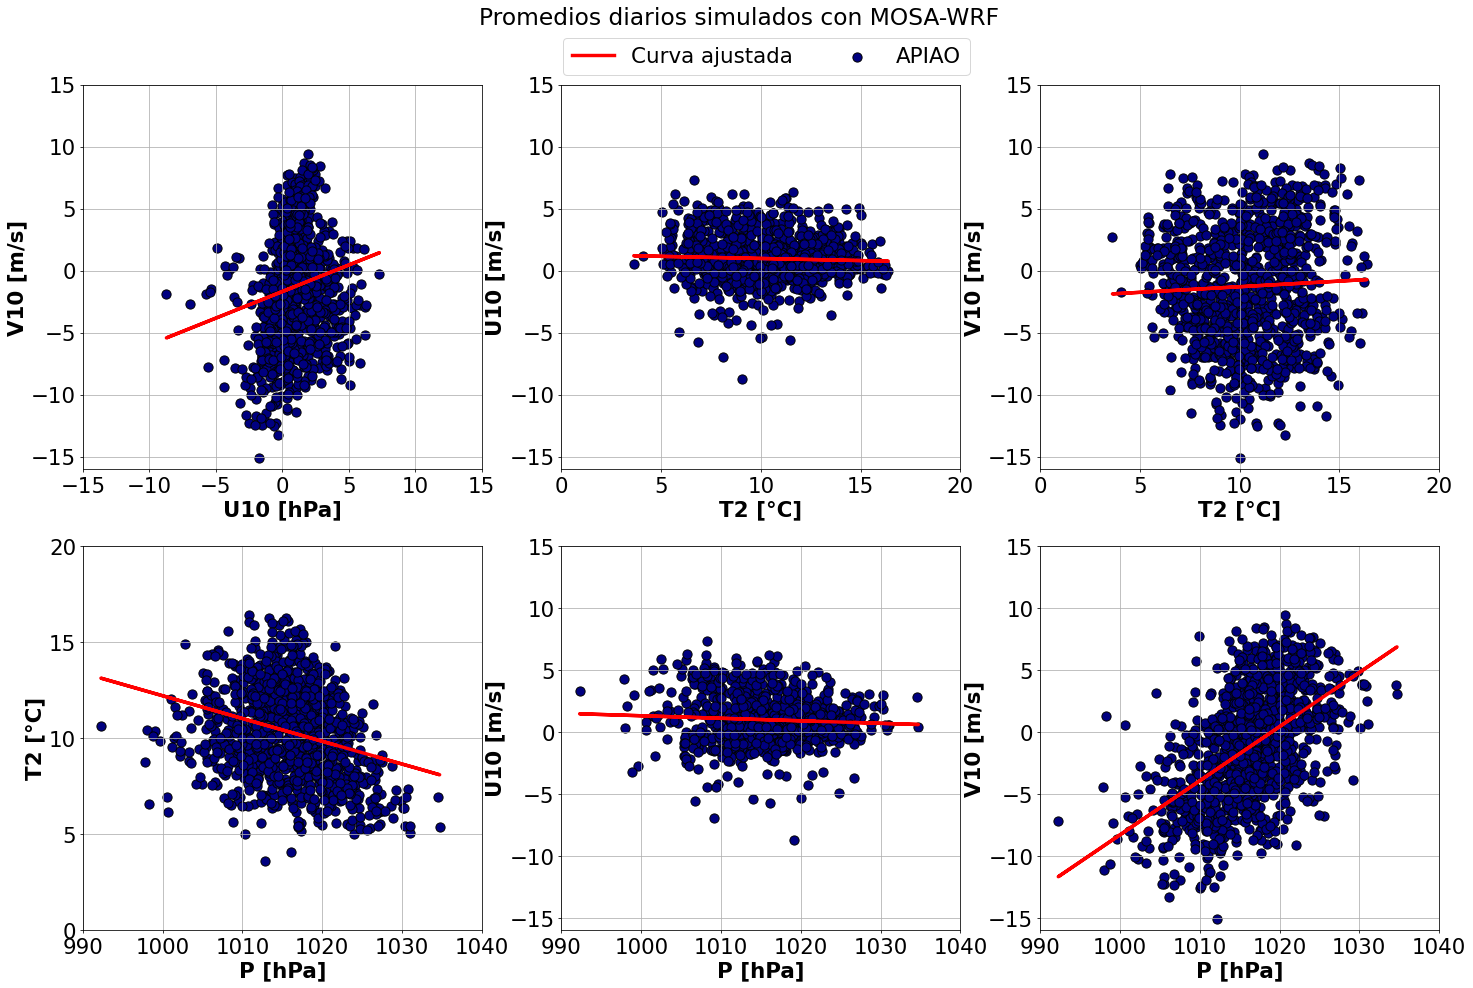

In [4]:
# DIAGRAMAS DE DISPERSIÓN PARA LOS PROMEDIOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(2,3,figsize=(25,16),dpi=70)
fig.suptitle('Promedios diarios simulados con MOSA-WRF',x=0.5,y=0.95,fontsize=24)
plt.rc('xtick', labelsize=22) ; plt.rc('ytick', labelsize=22) 
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
# U10 VS V10
ax[0,0].scatter(APIAO_diario["U10_WRF_mean"], APIAO_diario["V10_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
#ax[2].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='green',linewidth=3.5)
ax[0,0].plot(U10_WRF_Mean, U10_V10_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[0,0].set_ylabel('V10 [m/s]', fontsize = 22, weight='bold'); ax[0,0].set_xlabel('U10 [hPa]', fontsize = 22, weight='bold')
#ax[1,2].legend(fontsize=22,loc='upper right')
ax[0,0].yaxis.set_major_locator(loc)
ax[0,0].set_xlim(-15,15);   ax[0,0].set_ylim(-16,15);   ax[0,0].grid(True)
ax[0,0].legend(fontsize=22)
ax[0,0].legend(bbox_to_anchor=(2.25, 1.15),fontsize=22,ncol=2)

# T2 VS U10
ax[0,1].scatter(APIAO_diario["T2_WRF_mean"], APIAO_diario["U10_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
#ax[1].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='green',linewidth=3.5)
ax[0,1].plot(T2_WRF_Mean, T2_U10_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[0,1].set_ylabel('U10 [m/s]', fontsize = 22, weight='bold'); ax[0,1].set_xlabel('T2 [°C]', fontsize = 22, weight='bold')
#ax[0,1].legend(fontsize=22,loc='upper right')
ax[0,1].yaxis.set_major_locator(loc)
ax[0,1].set_xlim(0,20);   ax[0,1].set_ylim(-16,15);   ax[0,1].grid(True)

# T2 VS V10
ax[0,2].scatter(APIAO_diario["T2_WRF_mean"], APIAO_diario["V10_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
#ax[0,2].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='green',linewidth=3.5)
ax[0,2].plot(T2_WRF_Mean, T2_V10_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[0,2].set_ylabel('V10 [m/s]', fontsize = 22, weight='bold'); ax[0,2].set_xlabel('T2 [°C]', fontsize = 22, weight='bold')
#ax[0,2].legend(fontsize=22,loc='upper right')
ax[0,2].yaxis.set_major_locator(loc)
ax[0,2].set_xlim(0,20);   ax[0,2].set_ylim(-16,15);   ax[0,2].grid(True)

#  P VS T2
ax[1,0].scatter(APIAO_diario["P_WRF_mean"], APIAO_diario["T2_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
#ax[0,0].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='green',linewidth=3.5)
ax[1,0].plot(P_WRF_Mean, P_T2_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[1,0].set_xlabel('P [hPa]', fontsize = 22, weight='bold'); ax[1,0].set_ylabel('T2 [°C]', fontsize = 22, weight='bold')
#ax[1,0].legend(fontsize=22)
#ax[1,0].legend(bbox_to_anchor=(2.25, 1.15),fontsize=22,ncol=2)
ax[1,0].yaxis.set_major_locator(loc)
ax[1,0].set_ylim(0,20);   ax[1,0].set_xlim(990,1040);  
ax[1,0].grid(True)

# P VS U10
ax[1,1].scatter(APIAO_diario["P_WRF_mean"], APIAO_diario["U10_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
#ax[3].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='green',linewidth=3.5)
ax[1,1].plot(P_WRF_Mean, P_U10_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[1,1].set_ylabel('U10 [m/s]', fontsize = 22, weight='bold'); ax[1,1].set_xlabel('P [hPa]', fontsize = 22, weight='bold')
#ax[1,0].legend(fontsize=22,loc='upper right')
ax[1,1].yaxis.set_major_locator(loc)
ax[1,1].set_xlim(990,1040);   ax[1,1].set_ylim(-16,15);   ax[1,1].grid(True)

# P VS V10
ax[1,2].scatter(APIAO_diario["P_WRF_mean"], APIAO_diario["V10_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
#ax[2].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='green',linewidth=3.5)
ax[1,2].plot(P_WRF_Mean, P_V10_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[1,2].set_ylabel('V10 [m/s]', fontsize = 22, weight='bold'); ax[1,2].set_xlabel('P [hPa]', fontsize = 22, weight='bold')
#ax[1,1].legend(fontsize=22,loc='upper right')
ax[1,2].yaxis.set_major_locator(loc)
ax[1,2].set_xlim(990,1040);   ax[1,2].set_ylim(-16,15);   ax[1,2].grid(True)



# A PARTIR DE LOS DIAGRAMAS DE DISPERSIÓN PODEMOS OBSERVAR QUE LOS PROMEDIOS DIARIOS NO ESTAN CORRELACIONADOS...

In [ ]:
# AHORA SI PREPARAMOS EL CODIGO...

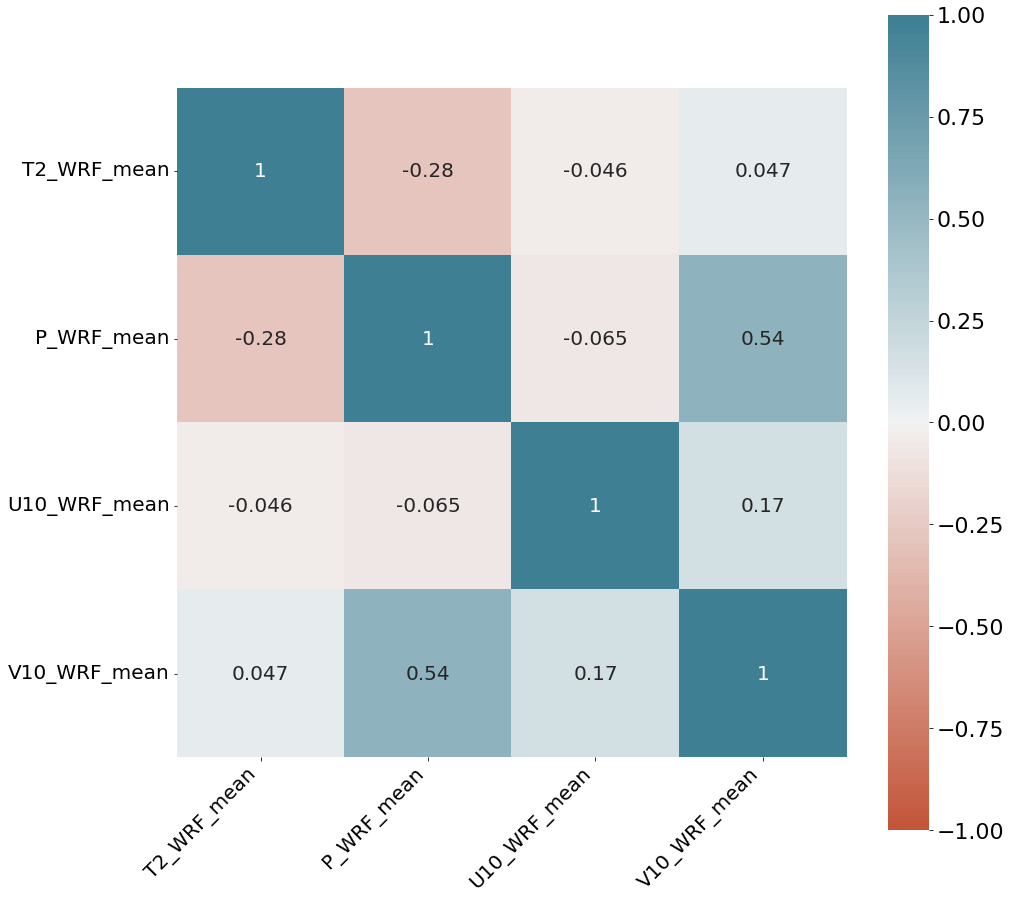

In [5]:
## REGRESION LINEAL MULTIPLE PARA PROMEDIOS DIARIOS EN APIAO..

APIAO_promedio = APIAO_diario.filter(['T2_WRF_mean','P_WRF_mean','U10_WRF_mean','V10_WRF_mean'], axis=1)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = APIAO_promedio.select_dtypes(include=['float64', 'int']).corr(method='pearson')
#tidy_corr_matrix(corr_matrix).head(30)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 20},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 20)

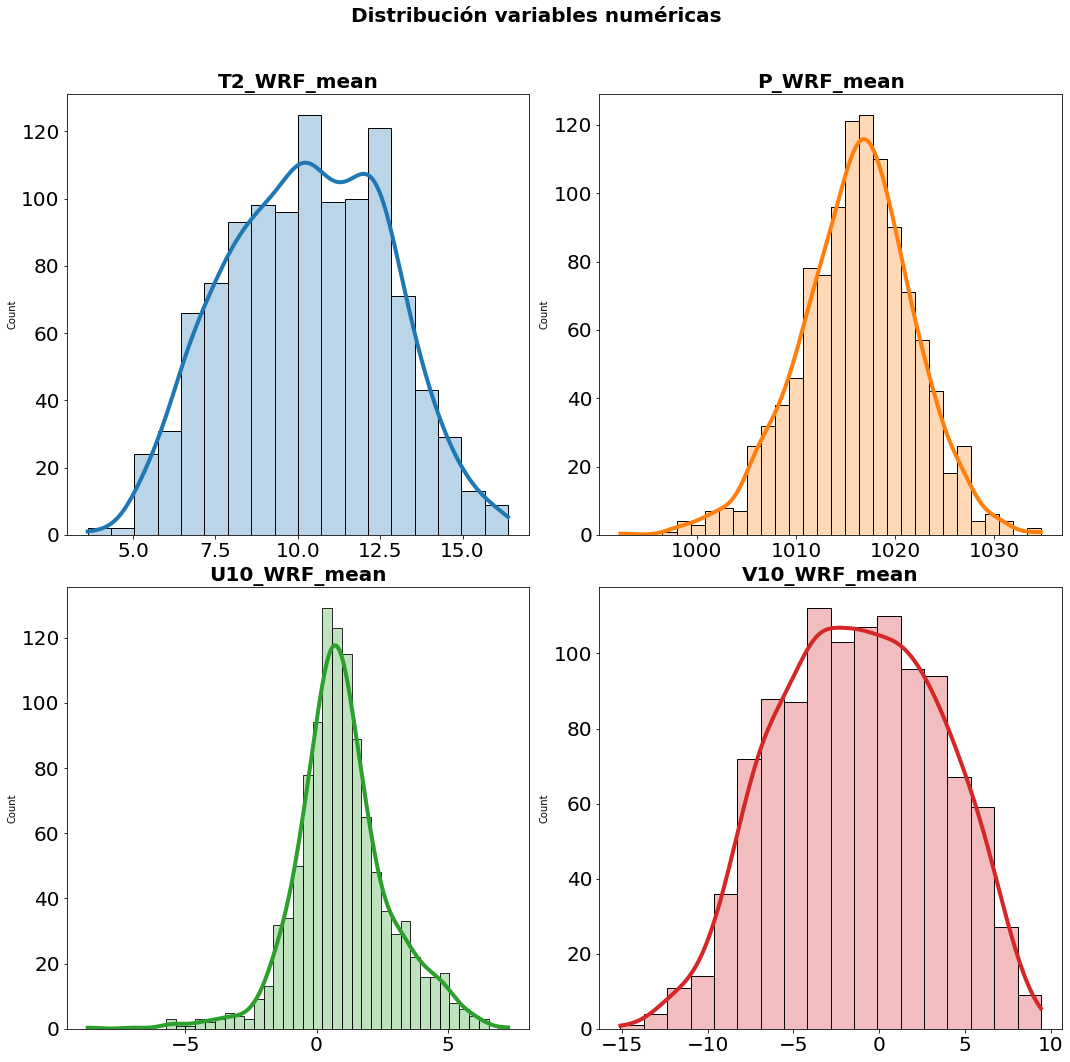

In [6]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = axes.flat
columnas_numeric = APIAO_promedio.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = APIAO_diario,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 4},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 20, fontweight = "bold");

In [7]:
# División de los datos en train y test
# ==============================================================================
APIAO_mean = APIAO_diario.filter(['T2_mean','T2_WRF_mean','P_WRF_mean','U10_WRF_mean','V10_WRF_mean'], axis=1)
X = APIAO_mean[['T2_WRF_mean', 'P_WRF_mean', 'U10_WRF_mean','V10_WRF_mean']]
y = APIAO_mean['T2_mean']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     2898.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:49:08   Log-Likelihood:                -874.06
No. Observations:                 877   AIC:                             1758.
Df Residuals:                     872   BIC:                             1782.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -28.1735      5.385     -5.231   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


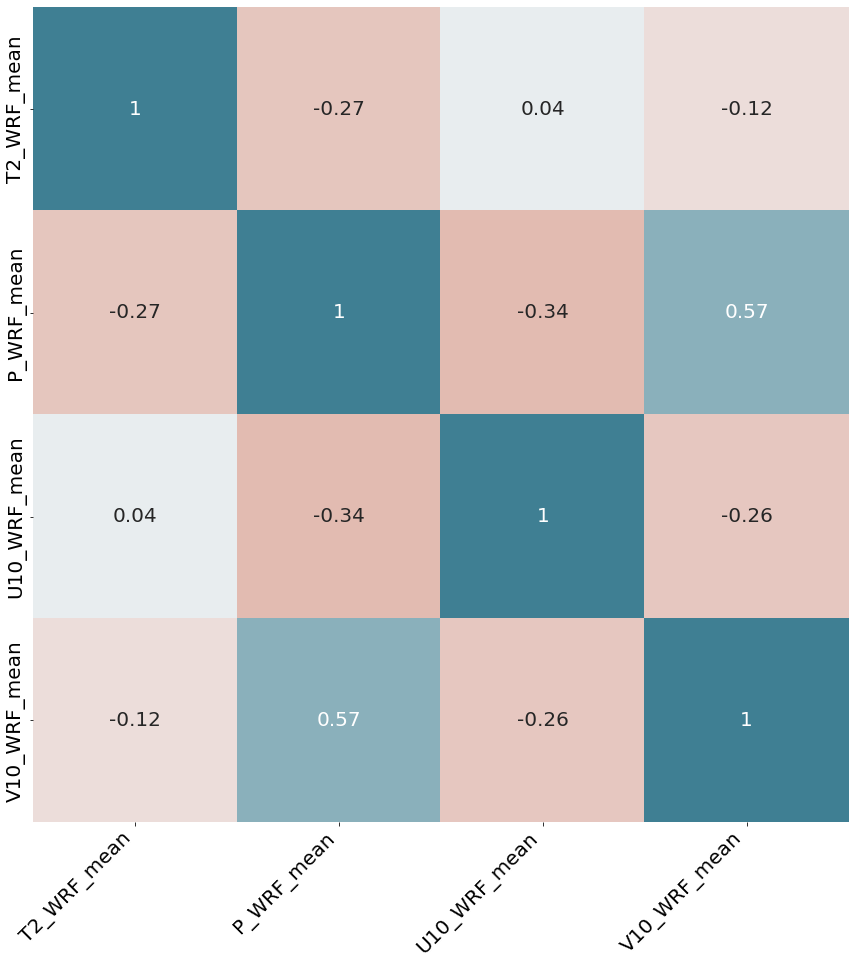

In [8]:
## REGRESIÓN LINEAL MÚLTIPLE PARA PROMEDIOS DIARIOS EN CUCAO
# ==============================================================================
CUCAO_promedio = CUCAO_diario.filter(['T2_WRF_mean','P_WRF_mean','U10_WRF_mean','V10_WRF_mean'], axis=1)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = CUCAO_promedio.select_dtypes(include=['float64', 'int']).corr(method='pearson')
#tidy_corr_matrix(corr_matrix).head(30)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 20},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 20)

In [9]:
# División de los datos en train y test
# ==============================================================================
CUCAO_mean = CUCAO_diario.filter(['T2_mean','T2_WRF_mean','P_WRF_mean','U10_WRF_mean','V10_WRF_mean'], axis=1)
X = CUCAO_mean[['T2_WRF_mean', 'P_WRF_mean', 'U10_WRF_mean','V10_WRF_mean']]
y = CUCAO_mean['T2_mean']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     850.1
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          4.35e-299
Time:                        16:49:25   Log-Likelihood:                -1395.6
No. Observations:                 877   AIC:                             2801.
Df Residuals:                     872   BIC:                             2825.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0089      8.974     -0.112   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


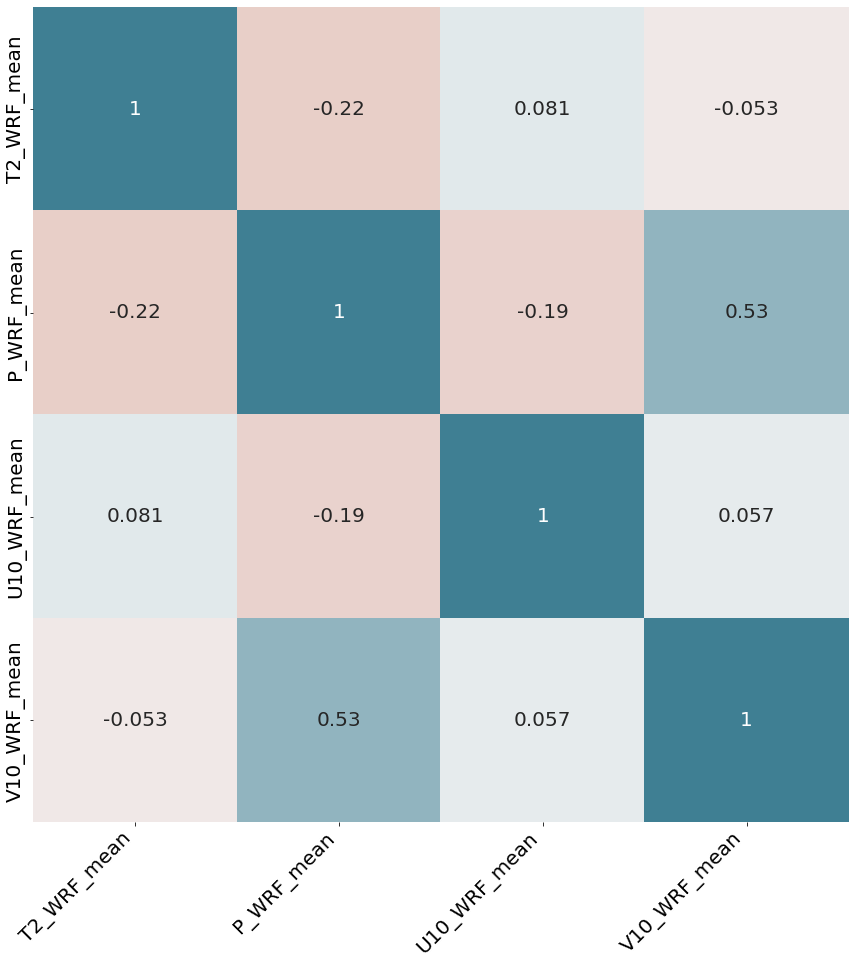

In [10]:
## REGRESIÓN LINEAL MÚLTIPLE PARA PROMEDIOS DIARIOS EN MELINKA
# ==============================================================================
MELINKA_promedio = MELINKA_diario.filter(['T2_WRF_mean','P_WRF_mean','U10_WRF_mean','V10_WRF_mean'], axis=1)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = MELINKA_promedio.select_dtypes(include=['float64', 'int']).corr(method='pearson')
#tidy_corr_matrix(corr_matrix).head(30)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 20},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 20)

In [11]:
# División de los datos en train y test
# ==============================================================================
MELINKA_mean = MELINKA_diario.filter(['T2_mean','T2_WRF_mean','P_WRF_mean','U10_WRF_mean','V10_WRF_mean'], axis=1)
X = MELINKA_mean[['T2_WRF_mean', 'P_WRF_mean', 'U10_WRF_mean','V10_WRF_mean']]
y = MELINKA_mean['T2_mean']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2701.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:49:35   Log-Likelihood:                -1030.4
No. Observations:                 877   AIC:                             2071.
Df Residuals:                     872   BIC:                             2095.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -35.5099      5.347     -6.641   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-46.005233,-25.014660
T2_WRF_mean,1.028106,1.068559
P_WRF_mean,0.025845,0.046462
U10_WRF_mean,-0.060741,-0.019388
V10_WRF_mean,0.106935,0.144532


In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train



In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");